In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [3]:
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_train=pd.read_csv(io.StringIO(s.decode("utf-8")))
df_train = df_train.drop(labels=["Id"],axis=1)
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
labels_map={'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df_train["Class"] = df_train["Species"].map(labels_map)
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [5]:
x = df_train.drop(labels=["Species","Class"],axis=1).values
print(len(np.where(np.isnan(x))[0]))

0


In [6]:
np.set_printoptions(suppress=True)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
print('StandardScaler 縮放過後資料集 X 的平均值 : ', x_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X 的標準差 : ', x_scaled.std(axis=0))

StandardScaler 縮放過後資料集 X 的平均值 :  [-0. -0.  0. -0.]
StandardScaler 縮放過後資料集 X 的標準差 :  [1. 1. 1. 1.]


C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

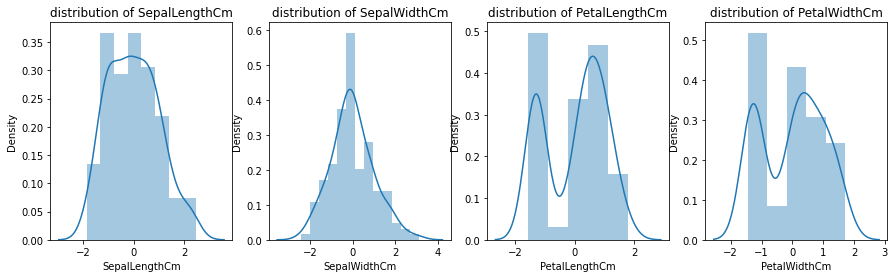

In [23]:
fig, axis = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(x_scaled[:,0],ax=axis[0])
sns.distplot(x_scaled[:,1],ax=axis[1])
sns.distplot(x_scaled[:,2],ax=axis[2])
sns.distplot(x_scaled[:,3],ax=axis[3])
axis[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axis[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axis[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axis[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")


C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


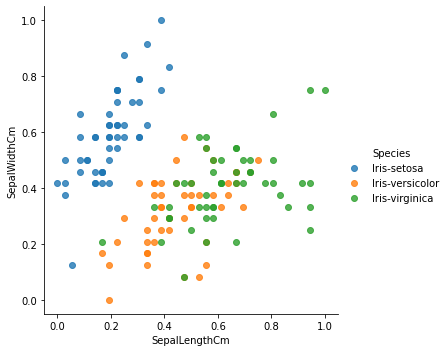

In [42]:
x_scaled = pd.DataFrame(x_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
x_scaled["Species"]=df_train["Species"]
sns.lmplot("SepalLengthCm","SepalWidthCm",hue="Species",data=x_scaled,fit_reg=False)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)).fit(x)
x_scaled = scaler.transform(x)
print('StandardScaler 縮放過後資料集 X 的平均值 : ', x_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X 的標準差 : ', x_scaled.std(axis=0))

StandardScaler 縮放過後資料集 X 的平均值 :  [0.4287037  0.43916667 0.46757062 0.45777778]
StandardScaler 縮放過後資料集 X 的標準差 :  [0.22925036 0.18006108 0.29805579 0.31692192]


C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

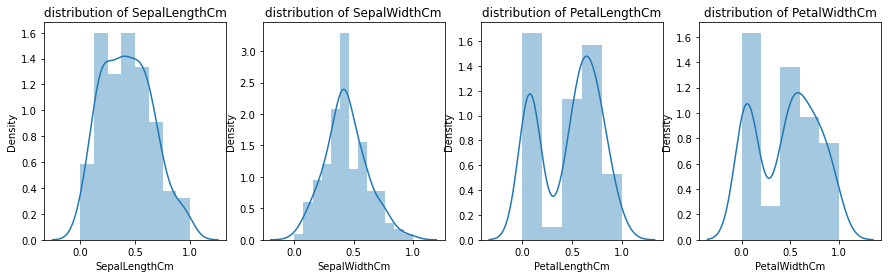

In [33]:
fig, axis = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(x_scaled[:,0],ax=axis[0])
sns.distplot(x_scaled[:,1],ax=axis[1])
sns.distplot(x_scaled[:,2],ax=axis[2])
sns.distplot(x_scaled[:,3],ax=axis[3])
axis[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axis[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axis[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axis[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")


In [ ]:
x_scaled = pd.DataFrame(x_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
x_scaled["Species"]=df_train["Species"]
sns.lmplot("SepalLengthCm","SepalWidthCm",hue="Species",data=x_scaled,fit_reg=False)

In [30]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler().fit(x)
x_scaled = scaler.transform(x)
print('StandardScaler 縮放過後資料集 X 的平均值 : ', x_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X 的標準差 : ', x_scaled.std(axis=0))

StandardScaler 縮放過後資料集 X 的平均值 :  [0.73966245 0.69409091 0.5447343  0.47946667]
StandardScaler 縮放過後資料集 X 的標準差 :  [0.10446852 0.09821513 0.2548593  0.30424505]


C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

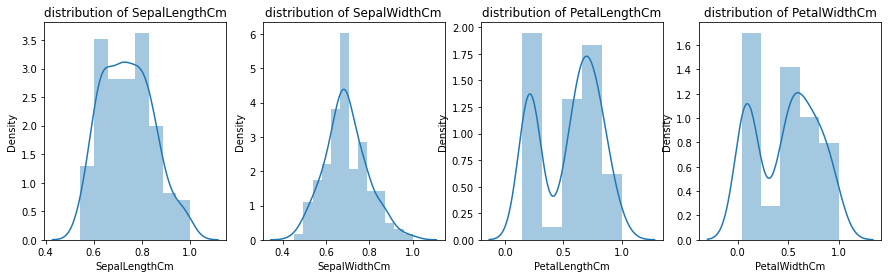

In [31]:
fig, axis = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(x_scaled[:,0],ax=axis[0])
sns.distplot(x_scaled[:,1],ax=axis[1])
sns.distplot(x_scaled[:,2],ax=axis[2])
sns.distplot(x_scaled[:,3],ax=axis[3])
axis[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axis[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axis[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axis[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")


In [8]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(x)
x_scaled = scaler.transform(x)
print('StandardScaler 縮放過後資料集 X 的平均值 : ', x_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X 的標準差 : ', x_scaled.std(axis=0))

StandardScaler 縮放過後資料集 X 的平均值 :  [ 0.03333333  0.108      -0.16895238 -0.06755556]
StandardScaler 縮放過後資料集 X 的標準差 :  [0.63484715 0.86429316 0.50243691 0.50707508]


C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

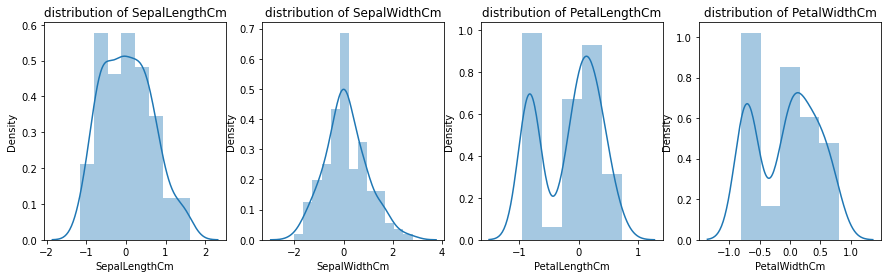

In [10]:
fig, axis = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(x_scaled[:,0],ax=axis[0])
sns.distplot(x_scaled[:,1],ax=axis[1])
sns.distplot(x_scaled[:,2],ax=axis[2])
sns.distplot(x_scaled[:,3],ax=axis[3])
axis[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axis[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axis[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axis[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")
